In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
# Melt
data = data.melt(
    id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "City", "Metro", "CountyName"],
    var_name="Date",
    value_name="ZHVI"
)
# Convert 'Date' column to datetime
data["Date"] = pd.to_datetime(data["Date"])
# Sort by date
data = data.sort_values(by=["Date", "ZHVI"], ascending=[True, False]).reset_index(drop=True)

In [ ]:
# NY data
NYdata = data[data["State"] == "NY"]

In [ ]:
# Sample data
sampledata = NYdata[data["City"].isin([
    "Bay Shore",           # 1
    "Huntington",          # 2
    "Patchogue",           # 3
    "Brentwood",           # 4
    "Central Islip",       # 5
    "Farmingdale",         # 6
    "Stony Brook",         # 7
    "Islandia",            # 8
    "Wyandanch",           # 9
    "Riverhead",           # 10
    "Huntington Station",  # 11
    "Hempstead"])]         # 12

<ipython-input-36-99b4bc192d56>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sampledata = NYdata[data["City"].isin([


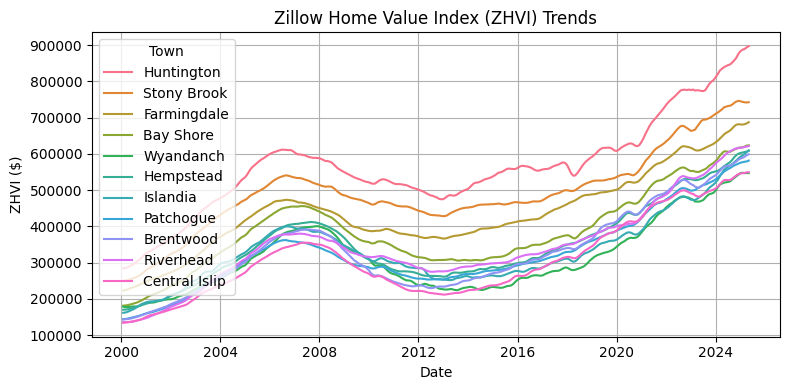

In [ ]:
# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=sampledata, x="Date", y="ZHVI", hue="City")
plt.title("Zillow Home Value Index (ZHVI) Trends")
plt.xlabel("Date")
plt.ylabel("ZHVI ($)")
plt.legend(title="Town")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Long Island Zip Codes
LIzipcodes = pd.read_csv('/content/longislandzipcodes.csv')
LIzipcodes['County'].value_counts()

,count
County,
Suffolk,117
Nassau,108


In [ ]:
# Get ZIP code lists for each county
suffolk_zips = LIzipcodes[LIzipcodes['County'] == 'Suffolk']['Zip'].unique()
nassau_zips  = LIzipcodes[LIzipcodes['County'] == 'Nassau']['Zip'].unique()

In [ ]:
# Filter NYdata for Suffolk and Nassau ZIP codes
suffolkdata = NYdata[NYdata['RegionName'].isin(suffolk_zips)].copy()
nassaudata  = NYdata[NYdata['RegionName'].isin(nassau_zips)].copy()
# Reset index
suffolkdata.reset_index(drop=True, inplace=True)
nassaudata.reset_index(drop=True, inplace=True)
# Sort by date
suffolkdata = suffolkdata.sort_values(by=["Date", "ZHVI"], ascending=[True, False]).reset_index(drop=True)
nassaudata  = nassaudata.sort_values(by=["Date", "ZHVI"], ascending=[True, False]).reset_index(drop=True)

In [ ]:
# Concatenate
longislanddata = pd.concat([suffolkdata, nassaudata], ignore_index=True)

In [ ]:
longislanddata['CountyName'].value_counts()

,count
CountyName,
Suffolk County,30704
Nassau County,20672


In [ ]:
# to csv file
longislanddata.to_csv('longislanddata.csv', index=False)

In [ ]:
# Filter Suffolk and Nassau for 2024
suffolk2024 = suffolkdata[suffolkdata['Date'].dt.year == 2024].copy()
suffolk2024 = suffolk2024.sort_values(by="Date", ascending=True).reset_index(drop=True)
nassau2024 = nassaudata[nassaudata['Date'].dt.year == 2024].copy()
nassau2024 = nassau2024.sort_values(by="Date", ascending=True).reset_index(drop=True)

In [ ]:
# Group by 'City' and calculate mean ZHVI
suffolk_city_avg = suffolk2024.groupby("City")["ZHVI"].mean().reset_index()
nassau_city_avg = nassau2024.groupby("City")["ZHVI"].mean().reset_index()
# Sort from highest to lowest
suffolk_city_avg = suffolk_city_avg.sort_values(by="ZHVI", ascending=False).reset_index(drop=True)
nassau_city_avg = nassau_city_avg.sort_values(by="ZHVI", ascending=False).reset_index(drop=True)

In [ ]:
# Add county column
suffolk_city_avg['County'] = 'Suffolk'
nassau_city_avg['County'] = 'Nassau'
# Concatenate
both_avg = pd.concat([suffolk_city_avg, nassau_city_avg], ignore_index=True)

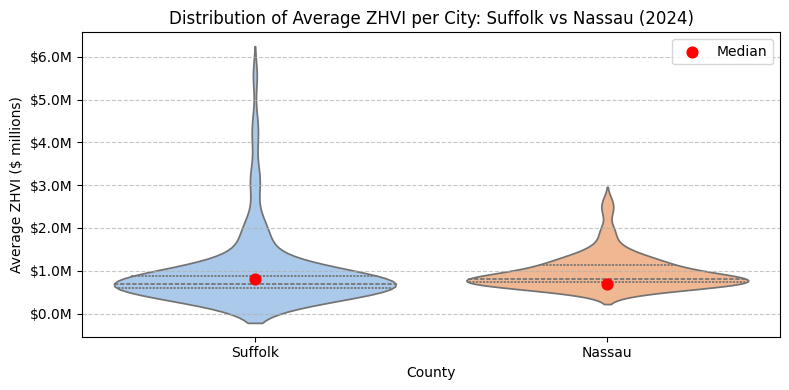

In [ ]:
import matplotlib.ticker as ticker

# Violin Plots
plt.figure(figsize=(8, 4))
ax = sns.violinplot(
    data=both_avg,
    x="County",
    y="ZHVI",
    inner="quartile",
    density_norm="width",
    hue="County",
    palette="pastel",
    legend=False
)

# Show the median with a marker and emphasize quartile lines for clarity
medians = both_avg.groupby("County")["ZHVI"].median()
for i, (county, median) in enumerate(medians.items()):
    ax.scatter(i, median, color="red", zorder=10, s=60, label="Median" if i == 0 else "")

# Avoid duplicate labels
handles, labels = ax.get_legend_handles_labels()
if "Median" in labels:
    plt.legend([handles[0]], [labels[0]], loc="upper right")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e6:.1f}M'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribution of Average ZHVI per City: Suffolk vs Nassau (2024)")
plt.xlabel("County")
plt.ylabel("Average ZHVI ($ millions)")
plt.tight_layout()
plt.show()

<ipython-input-48-5ec9515f5779>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=suffolk_city_avg, y="City", x="ZHVI", palette="mako")


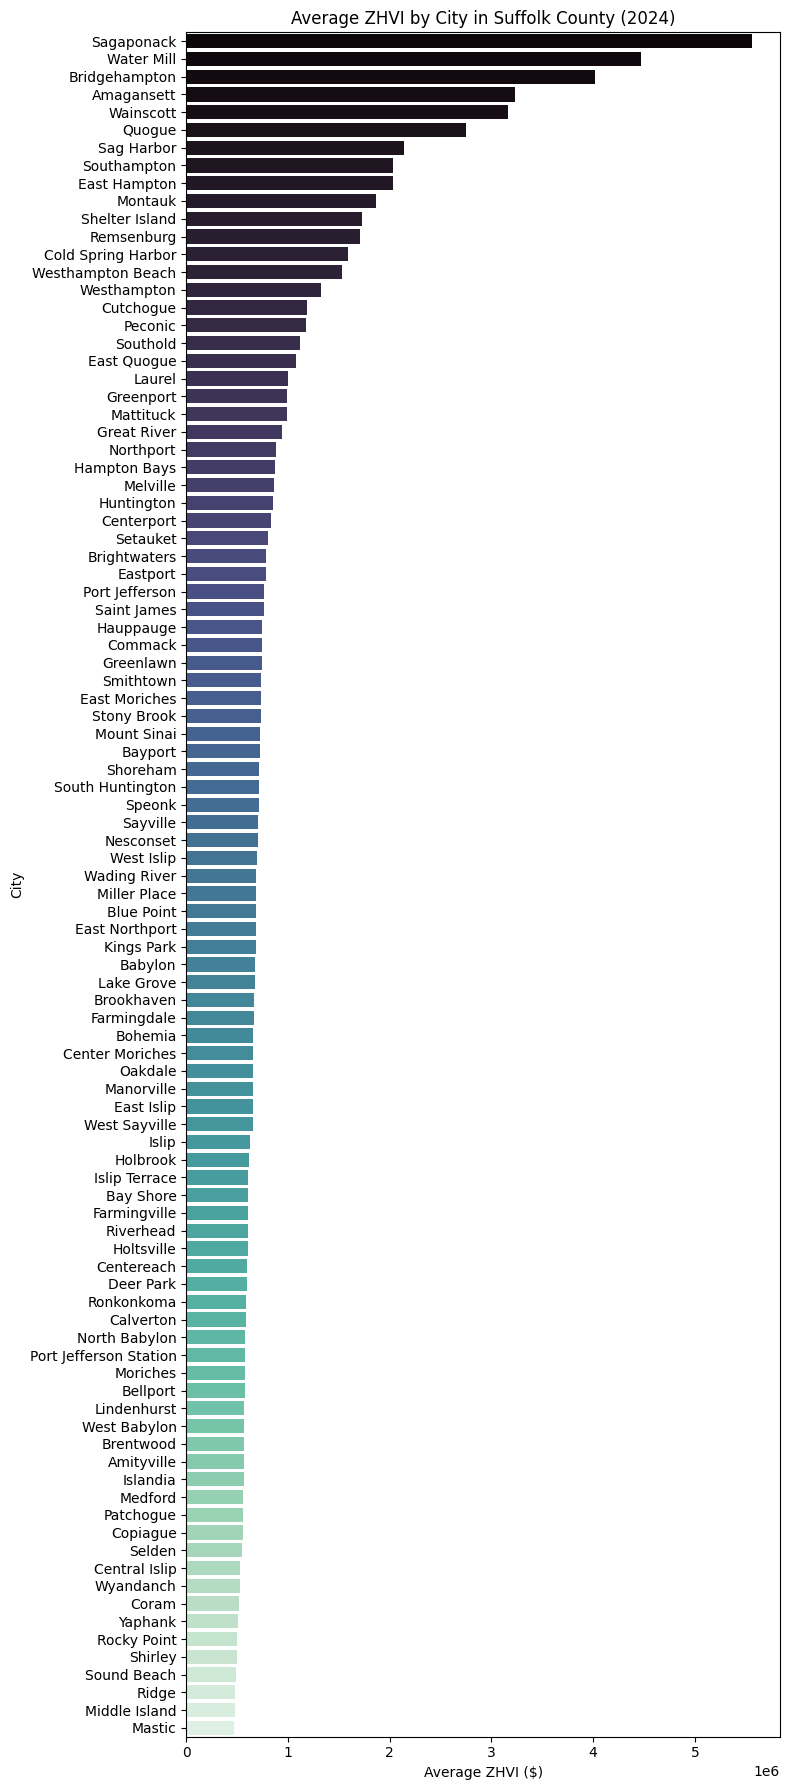

In [ ]:
plt.figure(figsize=(8, 18))
sns.barplot(data=suffolk_city_avg, y="City", x="ZHVI", palette="mako")
plt.title("Average ZHVI by City in Suffolk County (2024)")
plt.xlabel("Average ZHVI ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()